In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
style.use('seaborn-talk')

In [8]:
class AdalineSGD():
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        
        if random_state:
            np.random.seed(random_state)
    
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
    
        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
                
            cost = []
            for xi, target in zip(X,y):
                output = self.net_input(xi)
                error = target - output
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error
                cost.append(0.5 * error**2)
            
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        
        return self
    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

In [10]:
df = pd.read_csv('iris.csv', header=None)
y = df.iloc[:100, 4].values
y = np.where(y=='Iris-setosa',-1,1)
X = df.iloc[:100, [0,2]].values

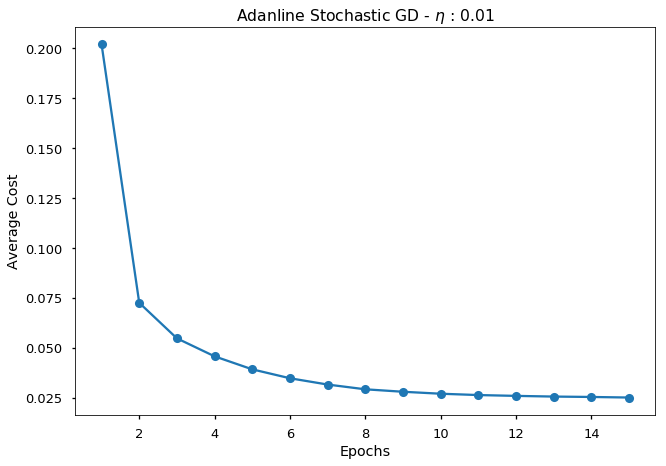

In [24]:
X_scaled = preprocessing.scale(X)
ada = AdalineSGD(eta=0.01, n_iter=15, random_state=1).fit(X_scaled, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.title(r'Adanline Stochastic GD - $\eta$ : 0.01')
plt.show()